# Exploration.15 - 문자를 읽을 수 있는 딥러닝

## 기본 개념

- OCR (Optical Character Reader)
    - 광학문자 인식 기술
    - 스캐너를 통해 입력된 문서 영상에서 문자에 해당하는 부분의 내용을 인식하는 기술




- OCR의 근간기술인 문자 인식 방법
    - 원형적합 방법
        - 문자의패턴을 배열 형태로 분류해 원형 패턴과 비교, 가장 유사한 형태를 찾아내는 방법
        - 문제점 : 하나의 고정된 형식의 문자에 대해서만 사용 가능
    - 통계적 방법
        - 학습단계를 통해 특정 벡터의 통계적인 확률분포 특징을 구하고, 이를 이용해 특징벡터 공간을 각 분류별로 분리
        - 장점 : 이론적인 정립이 잘 되어 있고 방법이 단순함
        - 단점 : 특징 문자에 대한 규칙이 활자체에 따라 매우 다양해지므로 인식 시간이 오래 걸림
    - 구조 분석적 방법
        - 문자의 구성 원리에 입각해 자획 등과 같은 문자를 구성하는 기본요소와 그들의 연관성을 추출해 문자를 인식하는 방법
    - 인공 신경망 방법
        - 계산량이 많고 병렬성을 요구하는 문제에 적합한 방법

## 프로젝트를 위한 가정 : 메뉴판 번역기 만들기
- 메뉴판 이미지 안에서의 텍스트를 읽는 reader 만들기
- 추후 reader로 읽은 텍스트를 번역 프로그램과 연결  
(현재에는 메뉴판에서 텍스트를 인식하는 것까지만 구현할 예정)

# <1. 구글 OCR API 활용>

## import Package

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 이미지 불러오기

In [2]:
path = os.getenv('HOME')+'/aiffel/ocr_python/menu'

In [3]:
image_name = [
    '/menu01.png',
    '/menu02.png',
    '/menu03.jpg',
    '/menu04.jpg',
    '/menu05.jpg',
    '/menu06.jpeg',
]

- 메뉴에는 텍스트가 많으므로 test에는 6개의 메뉴판만 활용함

In [4]:
image_path = []

for i in image_name:
    img = path+i
    image_path.append(img)

## 이미지 출력

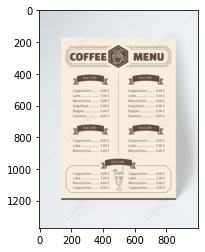

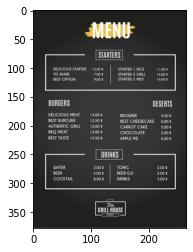

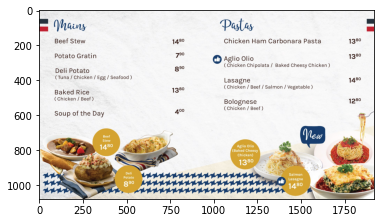

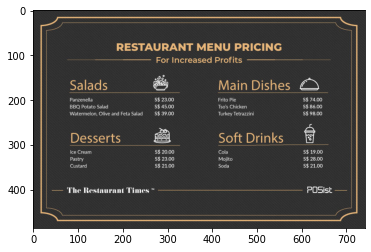

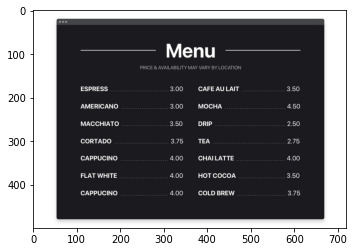

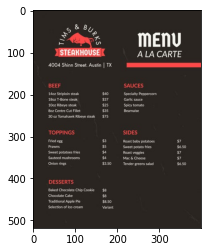

In [5]:
for img in image_path:
    img_bgr = cv2.imread(img)    # OpenCV로 이미지를 불러옵니다
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

## API 활용 코드 만들기

In [6]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

## 이미지에서 텍스트 읽기

In [7]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for path in image_path:
    detect_text(path)
    print('-------------------------------')

total 1260
-rw-r--r-- 1 root root 1289964 Feb 24 15:42 '[E-15]OCR_reading_text_v.2.02.ipynb'
Texts:

"ik
COFFEE
MENU
Hot Coffe
Hot Coffe
Сappuchino
9,00 $
Latte
Сappuchino
9,00 $
7,00 $
Moccachino
Latte
7,00 $
9,00 $
Moccachino
long black
6,00 $
9,00 $
long black
Doppio
Espresso ..
Doppio
5,00 $
8,00 $
6,00 $
5,00 $
8,00 $
Espresso
Hot Coffe
Pik
Hot Coffe
com
Cappuchino
9,00 $
........
Latte .....
Сappuchino
.... 9,00$
7,00 $
Moccachino ... 9,00 $
Latte
7,00 $
Moccachino
9,00 $
Hot Coffe
Сappuchino
Latte ...
9,00 $
7,00 $
Cappuchino .. 9,00 $
Моссаchino
Latte .
9,00 $
Cappuchino .. 9,00 $
7,00 $
9,00 $
Cappuchino ... 9,00 $
Moccachino
Lover
lovepik.com
Lover
lovepik.com
"

"ik"

"COFFEE"

"MENU"

"Hot"

"Coffe"

"Hot"

"Coffe"

"Сappuchino"

"9,00"

"$"

"Latte"

"Сappuchino"

"9,00"

"$"

"7,00"

"$"

"Moccachino"

"Latte"

"7,00"

"$"

"9,00"

"$"

"Moccachino"

"long"

"black"

"6,00"

"$"

"9,00"

"$"

"long"

"black"

"Doppio"

"Espresso"

".."

"Doppio"

"5,00"

"$"

"8,00"

"$"


**<구글 OCR API 평가>**
- 메뉴판에 텍스트가 많았지만 텍스트를 잘 출력함
- Сappuchino에서 'C'의 경우 철자 형태가 살짝 다르게 표현되었지만 출력에는 이상이 없음
- $$ 74.00 : 간혹 $와 S을 잘못 구분함

# <2. keras-ocr>

- 검출 모델 : CRAFT(Character Region Awareness for Text Detection)를 사용
- 인식 모델 : CRNN을 사용

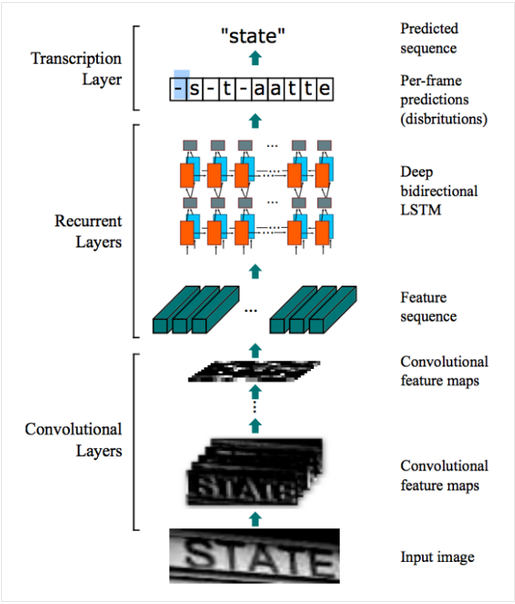

## import Package

In [8]:
import keras_ocr
import pytesseract
import os

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## keras_ocr.pipeline.Pipeline()
- 인식을 위한 파이프라인을 생성
- 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됨

In [9]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
images = [ keras_ocr.tools.read(image) for image in image_path]
prediction_groups = [pipeline.recognize([image]) for image in image_path]

- 만들어둔 파이프라인의 recognize() 에 메뉴 이미지를 넣어줌

## 시각화
- 내부적으로 recognize()는 검출기와 인식기를 둠
- 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출
- 인식기가 각 박스로부터 문자를 인식

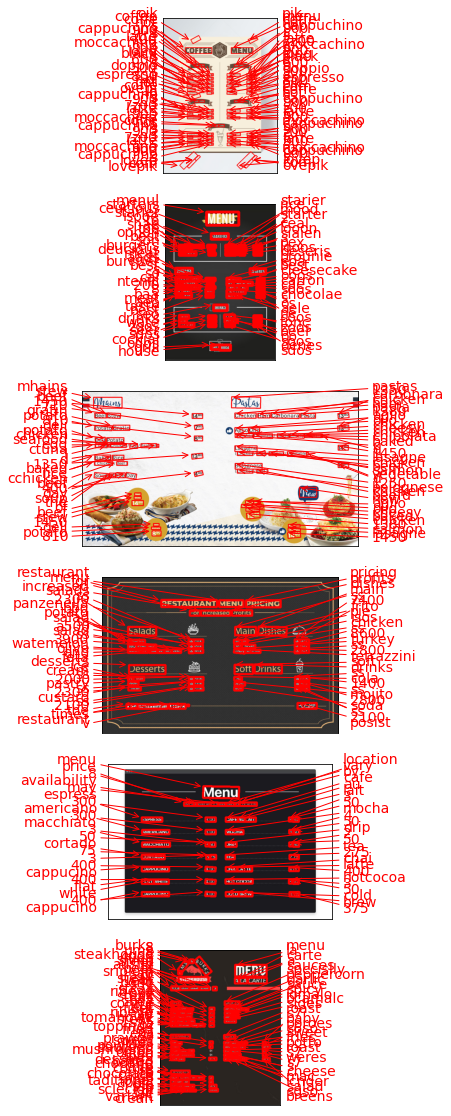

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

**<keras-ocr 평가>**
- 텍스트가 너무 많아서 구분이 잘 안감
- 틈틈이 보이는 단어를 보면서 구분해봄
- 틈틈이 보이는 단어들은 대체로 텍스트를 잘 출력함
- MENU를 'menul'로 잘못 출력됨
- Mains 글자가 너무 날려써져 있어서 'mhains'로 잘못 출력됨

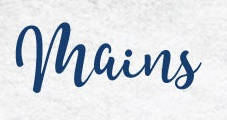

# <3. 테서랙트(Tesseract)>
- 버전 4에서는 LSTM이 엔진에 추가
- 현재 한국어를 포함한 116개 국어를 지원

## 테서랙트로 문자 검출하고 이미지 자르기 (detection)

In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

- crop_word_regions
    - image_path : crop 해야할 이미지
    - output_path : crop된 여러 이미지를 넣을 폴더 경로

In [13]:
image_path

['/aiffel/aiffel/ocr_python/menu/menu01.png',
 '/aiffel/aiffel/ocr_python/menu/menu02.png',
 '/aiffel/aiffel/ocr_python/menu/menu03.jpg',
 '/aiffel/aiffel/ocr_python/menu/menu04.jpg',
 '/aiffel/aiffel/ocr_python/menu/menu05.jpg',
 '/aiffel/aiffel/ocr_python/menu/menu06.jpeg']

In [14]:
image_name

['/menu01.png',
 '/menu02.png',
 '/menu03.jpg',
 '/menu04.jpg',
 '/menu05.jpg',
 '/menu06.jpeg']

In [15]:
image_path[0]

'/aiffel/aiffel/ocr_python/menu/menu01.png'

In [16]:
crop_file_path = [
    '/menu_01',
    '/menu_02',
    '/menu_03',
    '/menu_04',
    '/menu_05',
    '/menu_06',
]

- crop된 이미지가 각각 들어갈 폴더 지정

In [17]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/menu'

cropped_image_total = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

for i in range(6):
    work_dir_sub = work_dir+crop_file_path[i]
    cropped_image_path_list = crop_word_regions(image_path[i], work_dir_sub)
    cropped_image_total[i+1].append(cropped_image_path_list)

/aiffel/aiffel/ocr_python/menu/menu_01/0000.png
/aiffel/aiffel/ocr_python/menu/menu_01/0001.png
/aiffel/aiffel/ocr_python/menu/menu_01/0002.png
/aiffel/aiffel/ocr_python/menu/menu_01/0003.png
/aiffel/aiffel/ocr_python/menu/menu_01/0004.png
/aiffel/aiffel/ocr_python/menu/menu_01/0005.png
/aiffel/aiffel/ocr_python/menu/menu_01/0006.png
/aiffel/aiffel/ocr_python/menu/menu_01/0007.png
/aiffel/aiffel/ocr_python/menu/menu_01/0008.png
/aiffel/aiffel/ocr_python/menu/menu_01/0009.png
/aiffel/aiffel/ocr_python/menu/menu_01/0010.png
/aiffel/aiffel/ocr_python/menu/menu_01/0011.png
/aiffel/aiffel/ocr_python/menu/menu_01/0012.png
/aiffel/aiffel/ocr_python/menu/menu_01/0013.png
/aiffel/aiffel/ocr_python/menu/menu_01/0014.png
/aiffel/aiffel/ocr_python/menu/menu_01/0015.png
/aiffel/aiffel/ocr_python/menu/menu_01/0016.png
/aiffel/aiffel/ocr_python/menu/menu_01/0017.png
/aiffel/aiffel/ocr_python/menu/menu_01/0018.png
/aiffel/aiffel/ocr_python/menu/menu_01/0019.png
/aiffel/aiffel/ocr_python/menu/menu_01/0

In [18]:
cropped_image_total[1][0]

['/aiffel/aiffel/ocr_python/menu/menu_01/0000.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0001.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0002.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0003.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0004.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0005.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0006.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0007.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0008.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0009.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0010.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0011.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0012.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0013.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0014.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0015.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0016.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0017.png',
 '/aiffel/aiffel/ocr_python/menu/menu_01/0018.png',
 '/aiffel/ai

## 테서랙트로 잘린 이미지에서 단어 인식하기

In [19]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
for i in range(1,7):
    print('------{}번째 menu------'.format(i))
    cropped_image_path_list = cropped_image_total[i][0]
    recognize_images(cropped_image_path_list)

------1번째 menu------
Renee eee

(COFFEE

22e¢

I SR RRRRRRRRLRLRLRLLALALCLCLLCLWCAPLCL CC LLL

lll T 3]3]3#=«Xp>l’= éh$é$Pie tT"

Cappuchino

tr

| atte...

Moccacnino

iong

HIaACckK .

Doppio

> =

r Spresso

¥

Cappuchino


9,00

S

7,00 $

9,00

S

| atte


Moccacnino



fa

ht sone 9008 AS

\

wee 9,008 VY

|

Cappuchino .

De

| atte...

Moccacnino

Cappuchino .

De

|

~ F

seseeee 9,00 $



sesseeee 9,00 § AS

von :

Moccachino

iong

nlack ...

Doppio.

Espresso

weeeeeee 9,00 $


ce oe

Cappucnhino ........

9,00

S

Latte oo. 7,00 $

Moccachino

aeeeeeee 9,00 $

a seseesee 9,00 $

Cappuchino

| atte...

Moccachino

Cappuchino


amass

IQ —=EnERAS ,

Done
------2번째 menu------
———__—sx¥$FSiARIERS|} ———


a

SET

1

it

Vea

of Ru 2,01

14M


,

—_—_—_—=$ §«- mvmKRKKS>—_—



Waa

|


Re


faites

Done
------3번째 menu------
es

Wainy

Pasta

|

=

|

Beef

Stew

1480

Chicken

ham

C

**<테서랙트(Tesseract) 평가>**
- 위의 두 모듈에 비해서 출력이 제대로 되지 않음
    - 잘못 출력한 단어들이 종종 보임
    - 단어가 끊겨서 출력되기도 함
- 테서랙트는 메뉴판 번역기 서비스에 적합하지 않음

## 회고

### 1. 새로 알아갔던 점
 - 이미지 속 텍스트 출력을 처음 해봄
 - CNN + RNN인 CRNN을 알게됨

### 2. 흥미로웠던 점
 - 구글 OCR API의 성능이 매우 좋아 역시 구글이라는 생각을 하게 했음

### 3. 아쉬웠던 점
 - 각 모듈의 구동에 대한 깊은 내용은 직접 찾아봐야해서 아쉬웠음

### 4. 앞으로의 다짐
 - 각 모듈을 깊게 알아보고 개선 방향을 도출해야겠음